In [1]:
%autosave 120
import numpy as np
import matplotlib.pyplot as pl
from numba import jit

Autosaving every 120 seconds


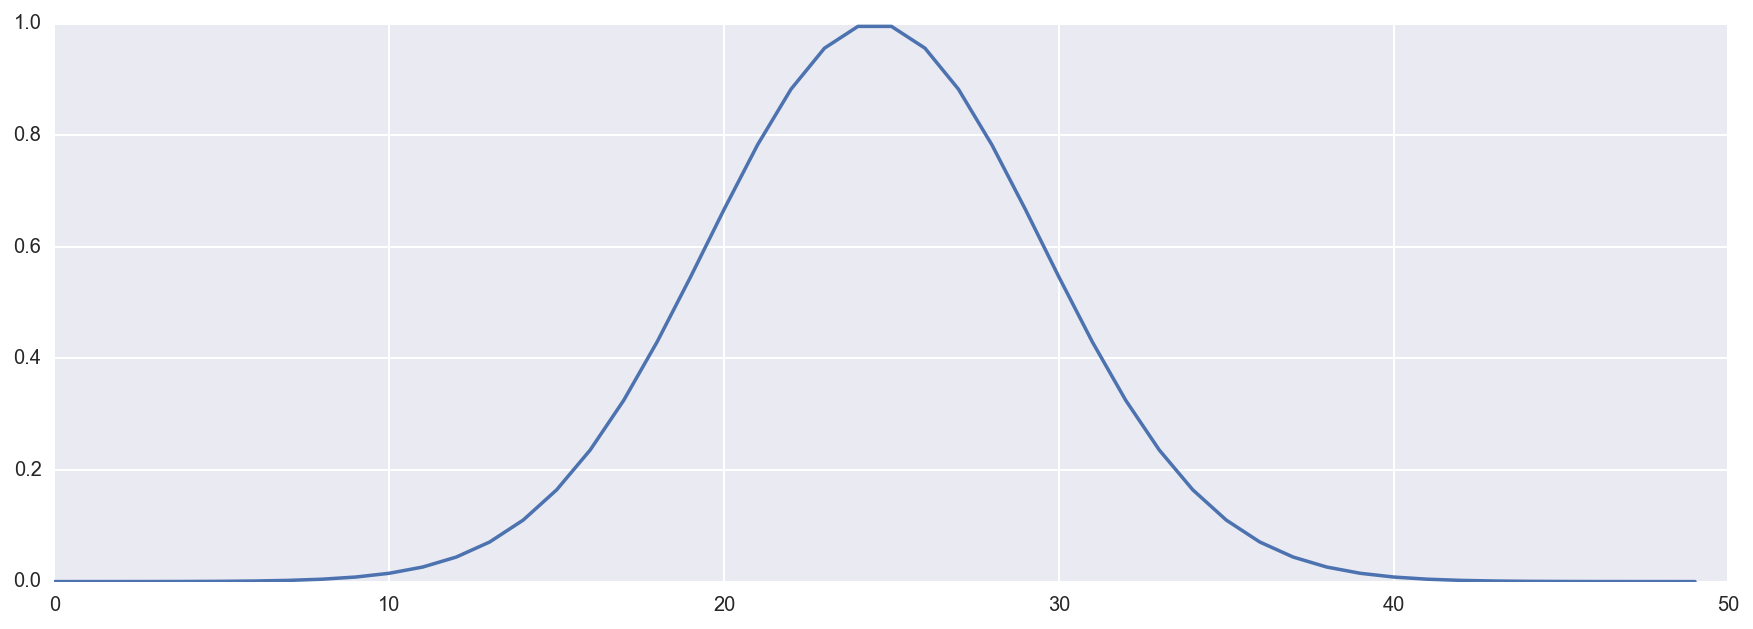

In [8]:
from scipy.signal import gaussian
SAMPLES = 10

# create the test data instance
xs = np.random.randn(SAMPLES, 1000)
y = gaussian(50, 5.0)
pl.plot(y)

Convolution defined by numpy: $y \ast x[n] = \sum_m y[m] \, x[n - m]$

In [9]:
def convolve_np(y, xs):
    return [np.convolve(y, x, mode='valid') for x in xs]

10 loops, best of 3: 427 µs per loop


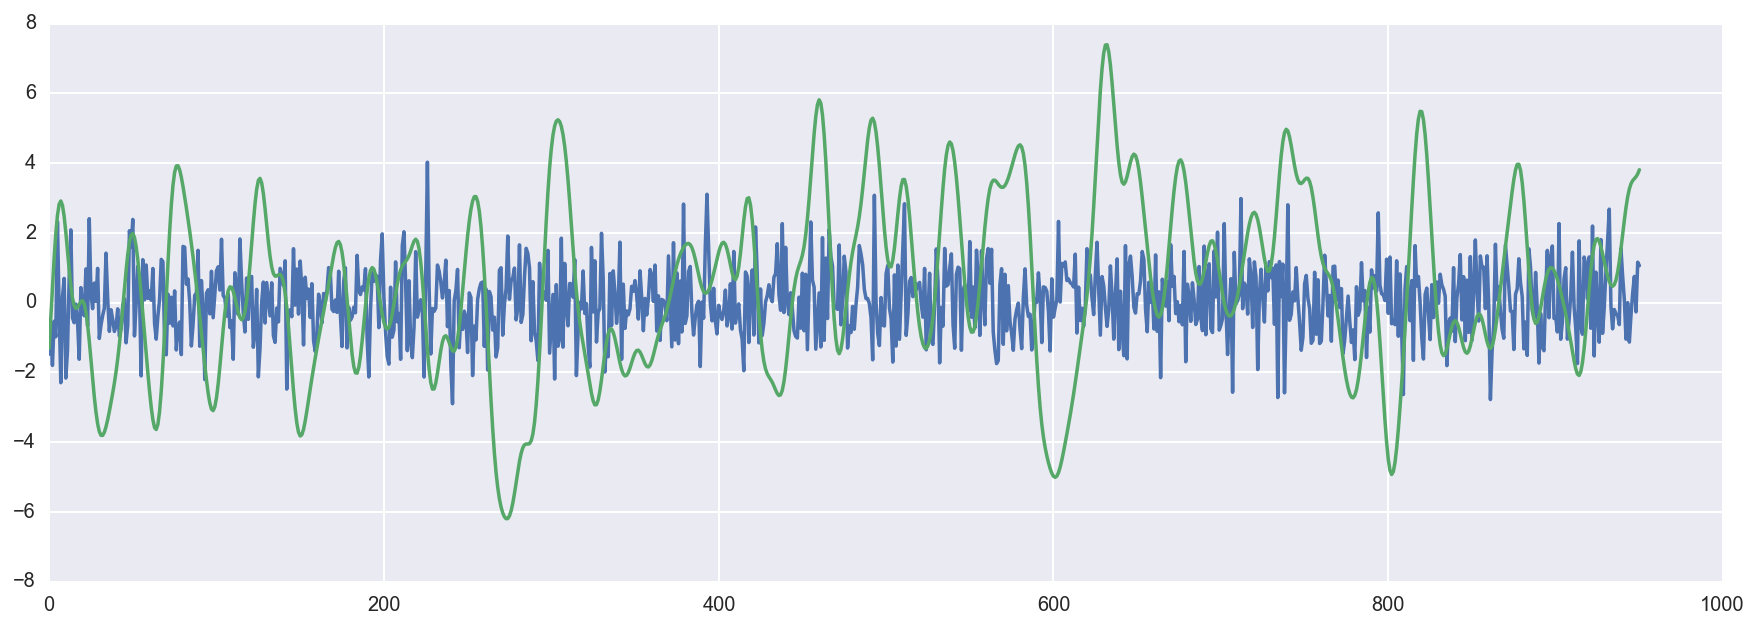

In [10]:
%timeit -n10 convolve_np(y, xs)
zs_np = convolve_np(y, xs)
pl.plot(xs[0][len(y) - 1:])
pl.plot(zs_np[0])

10 loops, best of 3: 366 ms per loop


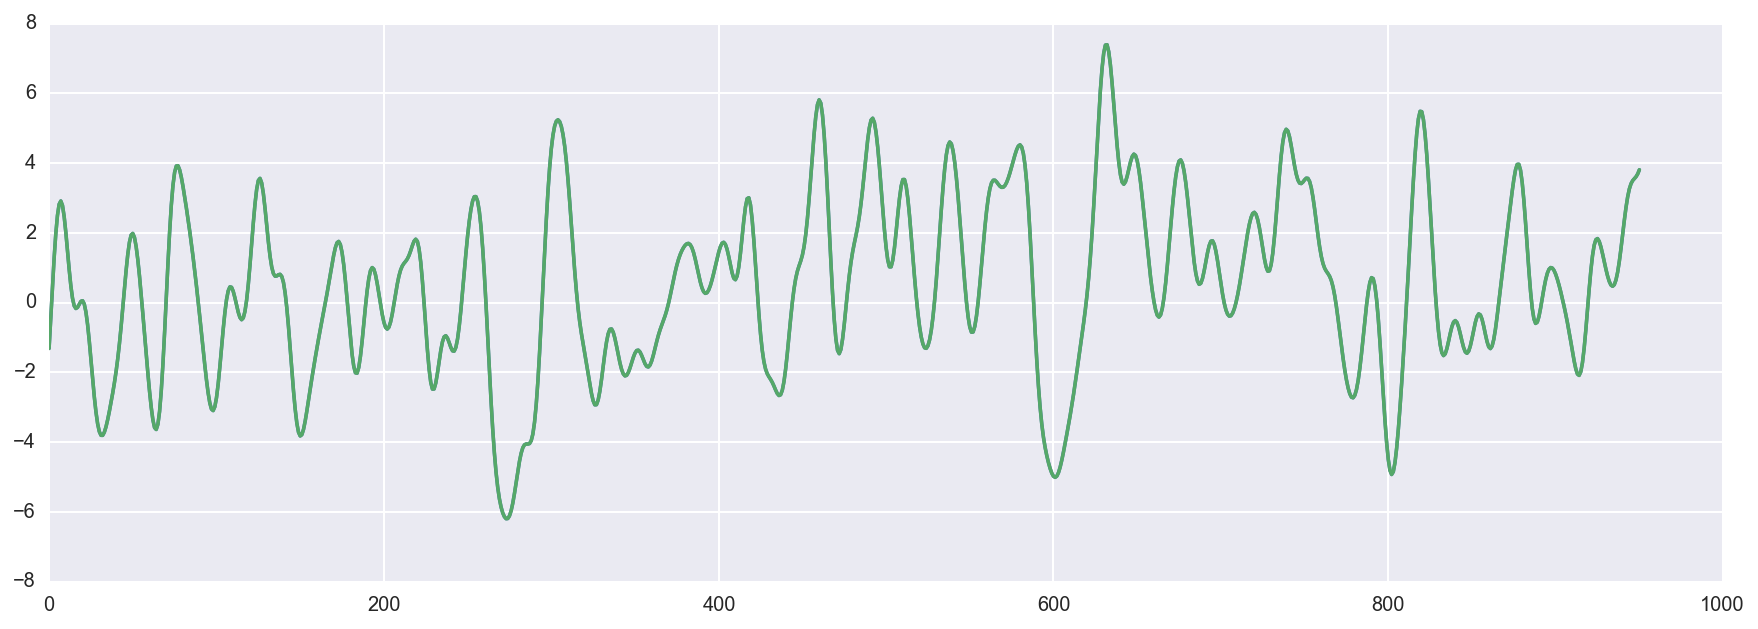

In [30]:
from itertools import izip

def convolve_py(y, xs):
    zs = np.zeros((xs.shape[0], xs.shape[1] - len(y) + 1), dtype=xs.dtype)
    for x, z in izip(xs, zs):
        for n in xrange(len(y) - 1, len(x)):
            for m in xrange(len(y)):
                z[n - len(y) + 1] += x[n - m] * y[m]
    return zs

%timeit -n10 convolve_py(y, xs)
zs_py = convolve_py(y, xs)
pl.plot(zs_np[0])
pl.plot(zs_py[0])

In [34]:
@jit(nopython=True)
def convolve_nb(y, xs):
    zs = list()
    for i in range(len(xs)):
        z = np.zeros(xs.shape[1] - len(y) + 1, dtype=xs.dtype)
        for n in xrange(len(y) - 1, len(xs[i])):
            for m in xrange(len(y)):
                z[i, n - len(y) + 1] += xs[i, n - m] * y[m]
        zs.append(z)
    return zs

zs_nb = convolve_nb(y, xs)
%timeit -n10 convolve_nb(y, xs)
pl.plot(zs_nb[0])
pl.plot(zs_py[0])

TypingError: Caused By:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/numba/compiler.py", line 201, in run
    res = stage()
  File "/usr/local/lib/python2.7/site-packages/numba/compiler.py", line 414, in stage_nopython_frontend
    self.locals)
  File "/usr/local/lib/python2.7/site-packages/numba/compiler.py", line 708, in type_inference_stage
    infer.build_constrain()
  File "/usr/local/lib/python2.7/site-packages/numba/typeinfer.py", line 386, in build_constrain
    self.constrain_statement(inst)
  File "/usr/local/lib/python2.7/site-packages/numba/typeinfer.py", line 506, in constrain_statement
    self.typeof_assign(inst)
  File "/usr/local/lib/python2.7/site-packages/numba/typeinfer.py", line 538, in typeof_assign
    self.typeof_global(inst, inst.target, value)
  File "/usr/local/lib/python2.7/site-packages/numba/typeinfer.py", line 603, in typeof_global
    loc=inst.loc)
TypingError: Untyped global name 'list'
File "<ipython-input-34-4b16235bf9c6>", line 3

Failed at nopython (nopython frontend)
Untyped global name 'list'
File "<ipython-input-34-4b16235bf9c6>", line 3

In [44]:
@jit(nopython=True)
def restsum(xs):
    rval = np.zeros(xs.shape[0])
    for i in range(len(xs)):
        rval += sum(xs[i])

In [46]:
from numba import cuda